<a href="https://colab.research.google.com/github/jamessutton600613-png/GC/blob/main/Untitled279.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

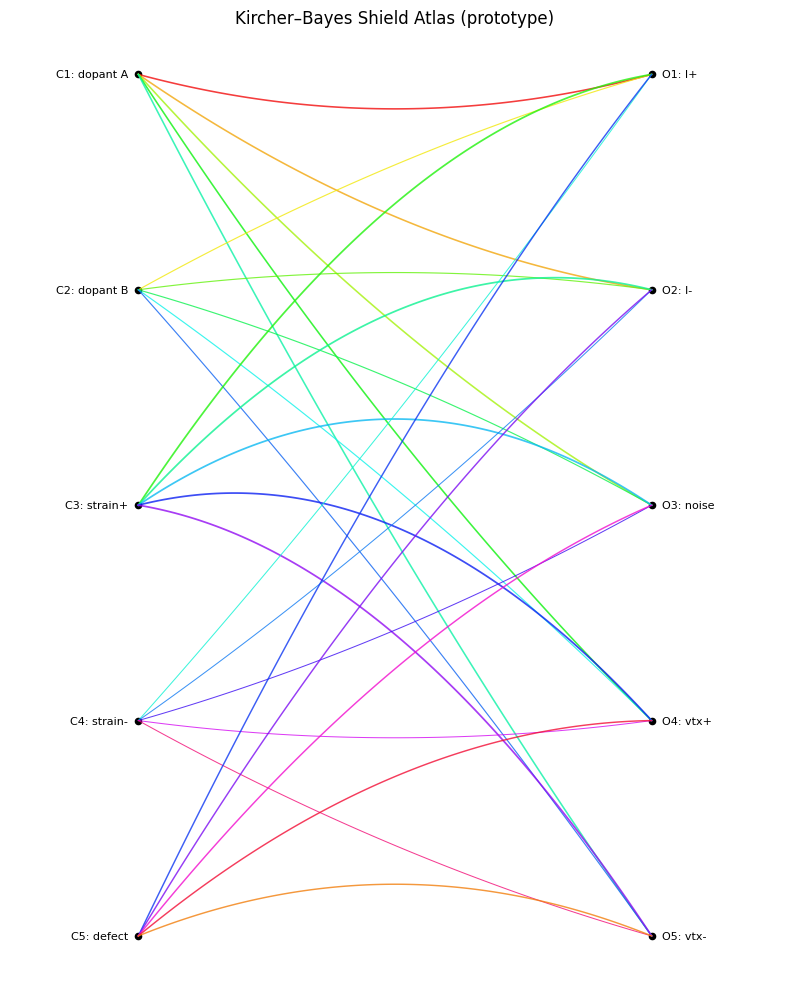

In [ ]:
import numpy as np                                   # [1]
import matplotlib.pyplot as plt                      # [2]
from matplotlib import colors                        # [3]

# -----------------------------
# CONFIG: priors & outputs
# -----------------------------                          # [7]

PRIORS = [                                            # [8]
    {"name": "C1: dopant A", "kappa": 0.3, "gamma": 0.8, "phi": 0.0},   # [9]
    {"name": "C2: dopant B", "kappa": 0.6, "gamma": 0.5, "phi": 1.0},   # [10]
    {"name": "C3: strain+",  "kappa": 1.0, "gamma": 0.9, "phi": 2.0},   # [11]
    {"name": "C4: strain-",  "kappa": 0.4, "gamma": 0.4, "phi": 3.0},   # [12]
    {"name": "C5: defect",   "kappa": 0.8, "gamma": 0.7, "phi": 4.0},   # [13]
]                                                  # [14]

OUTPUTS = [                                          # [15]
    {"name": "O1: I+",    "phi_shift": 0.0},         # [16]
    {"name": "O2: I-",    "phi_shift": 0.7},         # [17]
    {"name": "O3: noise", "phi_shift": 1.4},         # [18]
    {"name": "O4: vtx+",  "phi_shift": 2.1},         # [19]
    {"name": "O5: vtx-",  "phi_shift": 2.8},         # [20]
]                                                  # [21]

BASE_LINEWIDTH = 0.8                                # [22]
CURVE_STRENGTH = 0.4                                # [23]

# -----------------------------
# Helper functions
# -----------------------------                          # [27]

def phase_to_rgb(phi):                               # [28]
    """Map phase (radians) -> RGB via HSV wheel."""  # [29]
    # Normalize phase to [0, 1] as hue              # [30]
    hue = (phi % (2 * np.pi)) / (2 * np.pi)         # [31]
    sat = 0.95                                      # [32]
    val = 0.95                                      # [33]
    return colors.hsv_to_rgb((hue, sat, val))       # [34]

def bezier_curve(x0, y0, x1, y1, curvature):        # [35]
    """Return arrays (x, y) for a simple quadratic Bézier curve."""  # [36]
    xm = 0.5 * (x0 + x1)                            # [37]
    ym = 0.5 * (y0 + y1)                            # [38]
    # Offset control point vertically according to curvature        # [39]
    ym += curvature * (x1 - x0)                     # [40]
    t = np.linspace(0.0, 1.0, 100)                  # [41]
    x = (1 - t) ** 2 * x0 + 2 * (1 - t) * t * xm + t ** 2 * x1   # [42]
    y = (1 - t) ** 2 * y0 + 2 * (1 - t) * t * ym + t ** 2 * y1   # [43]
    return x, y                                     # [44]

def compute_gate_params(prior, output):             # [45]
    """
    Given a prior configuration and an output channel,
    return effective (kappa, gamma, phi) for that path.     # [48]
    """
    kappa = prior["kappa"]                           # [50]
    gamma = prior["gamma"]                           # [51]
    phi = prior["phi"] + output["phi_shift"]         # [52]
    return kappa, gamma, phi                         # [53]

# -----------------------------
# Build geometry (positions)
# -----------------------------                          # [57]

n_priors = len(PRIORS)                               # [58]
n_outputs = len(OUTPUTS)                             # [59]

x_left = 0.0                                         # [60]
x_right = 1.0                                        # [61]

# Vertical positions (top to bottom)                 # [62]
y_left = np.linspace(1.0, 0.0, n_priors)            # [63]
y_right = np.linspace(1.0, 0.0, n_outputs)          # [64]

# -----------------------------
# Plotting
# -----------------------------                          # [68]

fig, ax = plt.subplots(figsize=(8, 10))             # [69]

# Draw priors and outputs as nodes                   # [71]
for i, prior in enumerate(PRIORS):                  # [72]
    ax.scatter(x_left, y_left[i], s=20, color="black")        # [73]
    ax.text(x_left - 0.02, y_left[i], prior["name"],         # [74]
            ha="right", va="center", fontsize=8)    # [75]

for j, out in enumerate(OUTPUTS):                   # [76]
    ax.scatter(x_right, y_right[j], s=20, color="black")      # [77]
    ax.text(x_right + 0.02, y_right[j], out["name"],         # [78]
            ha="left", va="center", fontsize=8)     # [79]

# Draw all paths                                     # [81]
for i, prior in enumerate(PRIORS):                  # [82]
    for j, out in enumerate(OUTPUTS):               # [83]
        kappa, gamma, phi = compute_gate_params(prior, out)   # [84]
        curvature = CURVE_STRENGTH * (kappa - 0.5)            # [85]
        lw = BASE_LINEWIDTH * (0.4 + 1.3 * gamma)             # [86]
        color = phase_to_rgb(phi)                              # [87]
        x, y = bezier_curve(x_left, y_left[i],                # [88]
                            x_right, y_right[j], curvature)   # [89]
        ax.plot(x, y, linewidth=lw, color=color, alpha=0.8)   # [90]

# Style                                              # [92]
ax.set_xlim(-0.25, 1.25)                            # [93]
ax.set_ylim(-0.05, 1.05)                            # [94]
ax.axis("off")                                      # [95]
ax.set_title("Kircher–Bayes Shield Atlas (prototype)", fontsize=12)  # [96]

plt.tight_layout()                                  # [97]
plt.show()                                          # [98]

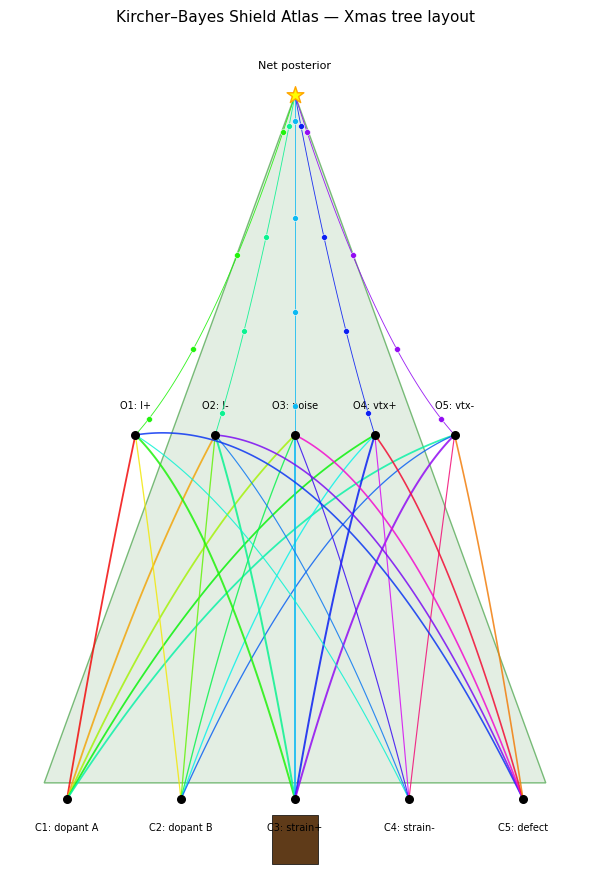

In [ ]:
import numpy as np                                      # [1]
import matplotlib.pyplot as plt                         # [2]
from matplotlib import colors                           # [3]
from matplotlib.patches import Polygon, Rectangle       # [4]

# -----------------------------
# CONFIG: priors & outputs
# -----------------------------                            # [7]

PRIORS = [                                               # [8]
    {"name": "C1: dopant A", "kappa": 0.3, "gamma": 0.8, "phi": 0.0},   # [9]
    {"name": "C2: dopant B", "kappa": 0.6, "gamma": 0.5, "phi": 1.0},   # [10]
    {"name": "C3: strain+",  "kappa": 1.0, "gamma": 0.9, "phi": 2.0},   # [11]
    {"name": "C4: strain-",  "kappa": 0.4, "gamma": 0.4, "phi": 3.0},   # [12]
    {"name": "C5: defect",   "kappa": 0.8, "gamma": 0.7, "phi": 4.0},   # [13]
]                                                         # [14]

OUTPUTS = [                                               # [15]
    {"name": "O1: I+",    "phi_shift": 0.0},              # [16]
    {"name": "O2: I-",    "phi_shift": 0.7},              # [17]
    {"name": "O3: noise", "phi_shift": 1.4},              # [18]
    {"name": "O4: vtx+",  "phi_shift": 2.1},              # [19]
    {"name": "O5: vtx-",  "phi_shift": 2.8},              # [20]
]                                                         # [21]

APEX = {"name": "Net posterior"}                          # [22]

BASE_LINEWIDTH = 0.9                                      # [23]
CURVE_STRENGTH = 0.35                                     # [24]

# -----------------------------
# Helper functions
# -----------------------------                            # [27]

def phase_to_rgb(phi):                                    # [28]
    """Map phase (radians) -> RGB via HSV wheel."""       # [29]
    hue = (phi % (2 * np.pi)) / (2 * np.pi)              # [30]
    sat = 0.95                                           # [31]
    val = 0.95                                           # [32]
    return colors.hsv_to_rgb((hue, sat, val))            # [33]

def bezier_curve(x0, y0, x1, y1, curvature):             # [34]
    """Simple quadratic Bézier curve between two points.""" # [35]
    xm = 0.5 * (x0 + x1)                                  # [36]
    ym = 0.5 * (y0 + y1)                                  # [37]
    ym += curvature * abs(x1 - x0)                        # [38]
    t = np.linspace(0.0, 1.0, 120)                        # [39]
    x = (1 - t) ** 2 * x0 + 2 * (1 - t) * t * xm + t ** 2 * x1   # [40]
    y = (1 - t) ** 2 * y0 + 2 * (1 - t) * t * ym + t ** 2 * y1   # [41]
    return x, y                                           # [42]

def compute_gate_params(prior, output):                   # [43]
    """Return effective (kappa, gamma, phi) for a prior→output path.""" # [44]
    kappa = prior["kappa"]                                # [45]
    gamma = prior["gamma"]                                # [46]
    phi = prior["phi"] + output["phi_shift"]              # [47]
    return kappa, gamma, phi                              # [48]

# -----------------------------
# Geometry: Xmas tree layout
# -----------------------------                            # [51]

n_priors = len(PRIORS)                                    # [52]
n_outputs = len(OUTPUTS)                                  # [53]

# Positions (0–1 in both axes)                            # [55]
y_priors = 0.10                                           # [56]
y_outputs = 0.55                                          # [57]
y_apex = 0.97                                             # [58]

x_priors = np.linspace(0.10, 0.90, n_priors)             # [59]
x_outputs = np.linspace(0.22, 0.78, n_outputs)           # [60]
x_apex = 0.50                                             # [61]

# -----------------------------
# Plotting
# -----------------------------                            # [64]

fig, ax = plt.subplots(figsize=(6, 9))                    # [65]

# --- draw tree silhouette ---                            # [67]
tree_poly = Polygon([[0.50, y_apex],                      # [68]
                     [0.06, y_priors + 0.02],             # [69]
                     [0.94, y_priors + 0.02]],            # [70]
                    closed=True,                          # [71]
                    facecolor=(0.0, 0.4, 0.0, 0.11),      # [72]
                    edgecolor=(0.0, 0.5, 0.0, 0.5),       # [73]
                    linewidth=1.0)                        # [74]
ax.add_patch(tree_poly)                                   # [75]

# trunk                                                     # [77]
trunk = Rectangle((0.46, 0.02), 0.08, 0.06,              # [78]
                  facecolor=(0.3, 0.15, 0.0, 0.9),       # [79]
                  edgecolor="black", linewidth=0.5)      # [80]
ax.add_patch(trunk)                                       # [81]

# --- nodes: priors, outputs, apex ---                    # [83]
for i, prior in enumerate(PRIORS):                        # [84]
    ax.scatter(x_priors[i], y_priors, s=30,              # [85]
               color="black", zorder=5)                  # [86]
    ax.text(x_priors[i], y_priors - 0.03, prior["name"], # [87]
            ha="center", va="top", fontsize=7)           # [88]

for j, out in enumerate(OUTPUTS):                        # [89]
    ax.scatter(x_outputs[j], y_outputs, s=30,            # [90]
               color="black", zorder=5)                  # [91]
    ax.text(x_outputs[j], y_outputs + 0.03, out["name"], # [92]
            ha="center", va="bottom", fontsize=7)        # [93]

# Apex (star)                                             # [95]
ax.scatter(x_apex, y_apex, marker="*", s=160,            # [96]
           color="yellow", edgecolor="orange",           # [97]
           linewidth=1.0, zorder=6)                      # [98]
ax.text(x_apex, y_apex + 0.03, APEX["name"],             # [99]
        ha="center", va="bottom", fontsize=8)            # [100]

# --- draw garlands: priors → outputs ---                 # [102]
for i, prior in enumerate(PRIORS):                       # [103]
    for j, out in enumerate(OUTPUTS):                    # [104]
        kappa, gamma, phi = compute_gate_params(prior, out)  # [105]
        curvature = CURVE_STRENGTH * (0.3 + kappa)       # [106]
        lw = BASE_LINEWIDTH * (0.4 + 1.3 * gamma)        # [107]
        color = phase_to_rgb(phi)                        # [108]
        x, y = bezier_curve(x_priors[i], y_priors,       # [109]
                            x_outputs[j], y_outputs, curvature)  # [110]
        ax.plot(x, y, linewidth=lw, color=color,         # [111]
                alpha=0.85, zorder=2)                    # [112]

# --- draw fairy-lights: outputs → apex ---               # [114]
for j, out in enumerate(OUTPUTS):                        # [115]
    # average prior params just for a quick decorative path # [116]
    mean_kappa = np.mean([p["kappa"] for p in PRIORS])   # [117]
    mean_gamma = np.mean([p["gamma"] for p in PRIORS])   # [118]
    mean_phi = np.mean([p["phi"] for p in PRIORS]) + out["phi_shift"]  # [119]
    curvature = -CURVE_STRENGTH * (0.4 + mean_kappa)     # [120]
    lw = 0.6 * BASE_LINEWIDTH * (0.5 + mean_gamma)       # [121]
    color = phase_to_rgb(mean_phi)                       # [122]
    x, y = bezier_curve(x_outputs[j], y_outputs,         # [123]
                        x_apex, y_apex, curvature)       # [124]
    ax.plot(x, y, linewidth=lw, color=color,             # [125]
            alpha=0.9, zorder=3)                         # [126]
    # add "baubles" along each light string               # [127]
    idxs = np.linspace(10, len(x) - 10, 4, dtype=int)    # [128]
    for k in idxs:                                       # [129]
        ax.scatter(x[k], y[k], s=18, color=color,        # [130]
                   edgecolor="white", linewidth=0.4,     # [131]
                   zorder=4)                             # [132]

# -----------------------------
# Final styling
# -----------------------------                            # [135]

ax.set_xlim(0.0, 1.0)                                    # [136]
ax.set_ylim(0.0, 1.05)                                   # [137]
ax.axis("off")                                           # [138]
ax.set_title("Kircher–Bayes Shield Atlas — Xmas tree layout",  # [139]
             fontsize=11)                                # [140]

plt.tight_layout()                                       # [141]
plt.show()                                               # [142]

Saving animation to xmas_tree_trails.mp4


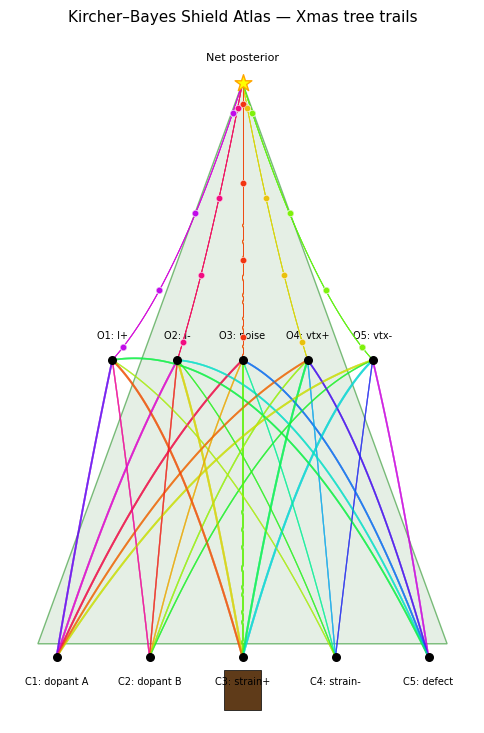

In [ ]:
import numpy as np                                          # [1]
import matplotlib.pyplot as plt                             # [2]
from matplotlib import colors                               # [3]
from matplotlib.patches import Polygon, Rectangle           # [4]
from matplotlib import animation                            # [5]

# ============================
# CONFIG
# ============================                              # [8]

PRIORS = [                                                  # [9]
    {"name": "C1: dopant A", "kappa": 0.3, "gamma": 0.8, "phi": 0.0},   # [10]
    {"name": "C2: dopant B", "kappa": 0.6, "gamma": 0.5, "phi": 1.0},   # [11]
    {"name": "C3: strain+",  "kappa": 1.0, "gamma": 0.9, "phi": 2.0},   # [12]
    {"name": "C4: strain-",  "kappa": 0.4, "gamma": 0.4, "phi": 3.0},   # [13]
    {"name": "C5: defect",   "kappa": 0.8, "gamma": 0.7, "phi": 4.0},   # [14]
]                                                           # [15]

OUTPUTS = [                                                 # [16]
    {"name": "O1: I+",    "phi_shift": 0.0},                # [17]
    {"name": "O2: I-",    "phi_shift": 0.7},                # [18]
    {"name": "O3: noise", "phi_shift": 1.4},                # [19]
    {"name": "O4: vtx+",  "phi_shift": 2.1},                # [20]
    {"name": "O5: vtx-",  "phi_shift": 2.8},                # [21]
]                                                           # [22]

APEX = {"name": "Net posterior"}                            # [23]

BASE_LINEWIDTH = 0.9                                        # [24]
CURVE_STRENGTH = 0.35                                       # [25]

N_FRAMES = 240          # total frames in the movie        # [26]
FPS = 24                # frames per second                # [27]
TRAIL_LEN = 10          # how many past states to overlay  # [28]
DT_PHASE = 0.10         # phase advance between frames     # [29]

SAVE_MP4 = True                                            # [30]
MP4_FILENAME = "xmas_tree_trails.mp4"                      # [31]

# ============================
# Helper functions
# ============================                              # [34]

def phase_to_rgb(phi):                                      # [35]
    """Map phase (radians) -> RGB via HSV wheel."""         # [36]
    hue = (phi % (2 * np.pi)) / (2 * np.pi)                # [37]
    sat = 0.95                                             # [38]
    val = 0.95                                             # [39]
    return colors.hsv_to_rgb((hue, sat, val))              # [40]

def bezier_curve(x0, y0, x1, y1, curvature):               # [41]
    """Simple quadratic Bézier curve between two points.""" # [42]
    xm = 0.5 * (x0 + x1)                                    # [43]
    ym = 0.5 * (y0 + y1)                                    # [44]
    ym += curvature * abs(x1 - x0)                          # [45]
    t = np.linspace(0.0, 1.0, 120)                          # [46]
    x = (1 - t) ** 2 * x0 + 2 * (1 - t) * t * xm + t ** 2 * x1   # [47]
    y = (1 - t) ** 2 * y0 + 2 * (1 - t) * t * ym + t ** 2 * y1   # [48]
    return x, y                                             # [49]

def compute_gate_params(prior, output, phase_offset):       # [50]
    """
    Return effective (kappa, gamma, phi) for a prior→output path,
    including a global time-dependent phase_offset.             # [53]
    """
    kappa = prior["kappa"]                                    # [54]
    gamma = prior["gamma"]                                    # [55]
    phi = prior["phi"] + output["phi_shift"] + phase_offset   # [56]
    return kappa, gamma, phi                                  # [57]

# ============================
# Geometry: Xmas tree layout
# ============================                              # [60]

n_priors = len(PRIORS)                                      # [61]
n_outputs = len(OUTPUTS)                                    # [62]

y_priors = 0.10                                             # [63]
y_outputs = 0.55                                            # [64]
y_apex = 0.97                                               # [65]

x_priors = np.linspace(0.10, 0.90, n_priors)               # [66]
x_outputs = np.linspace(0.22, 0.78, n_outputs)             # [67]
x_apex = 0.50                                               # [68]

# Pre-compute geometry of all paths (x,y arrays)            # [70]
PATHS_PO = []   # priors->outputs                           # [71]
for i, prior in enumerate(PRIORS):                          # [72]
    for j, out in enumerate(OUTPUTS):                       # [73]
        curvature = CURVE_STRENGTH * (0.3 + prior["kappa"]) # [74]
        x, y = bezier_curve(x_priors[i], y_priors,          # [75]
                            x_outputs[j], y_outputs, curvature) # [76]
        PATHS_PO.append(((i, j), x, y))                     # [77]

PATHS_OA = []   # outputs->apex                             # [79]
mean_kappa = np.mean([p["kappa"] for p in PRIORS])          # [80]
mean_gamma = np.mean([p["gamma"] for p in PRIORS])          # [81]
for j, out in enumerate(OUTPUTS):                           # [82]
    curvature = -CURVE_STRENGTH * (0.4 + mean_kappa)        # [83]
    x, y = bezier_curve(x_outputs[j], y_outputs,            # [84]
                        x_apex, y_apex, curvature)          # [85]
    PATHS_OA.append((j, x, y))                              # [86]

# ============================
# Set up figure
# ============================                              # [89]

fig, ax = plt.subplots(figsize=(6, 9))                      # [90]

# Tree silhouette                                           # [92]
tree_poly = Polygon([[0.50, y_apex],                        # [93]
                     [0.06, y_priors + 0.02],               # [94]
                     [0.94, y_priors + 0.02]],              # [95]
                    closed=True,                            # [96]
                    facecolor=(0.0, 0.4, 0.0, 0.10),        # [97]
                    edgecolor=(0.0, 0.5, 0.0, 0.5),         # [98]
                    linewidth=1.0)                          # [99]
ax.add_patch(tree_poly)                                     # [100]

# Trunk                                                     # [102]
trunk = Rectangle((0.46, 0.02), 0.08, 0.06,                # [103]
                  facecolor=(0.3, 0.15, 0.0, 0.9),         # [104]
                  edgecolor="black", linewidth=0.5)        # [105]
ax.add_patch(trunk)                                         # [106]

# Static nodes: priors and outputs                          # [108]
for i, prior in enumerate(PRIORS):                          # [109]
    ax.scatter(x_priors[i], y_priors, s=30,                 # [110]
               color="black", zorder=5)                    # [111]
    ax.text(x_priors[i], y_priors - 0.03, prior["name"],   # [112]
            ha="center", va="top", fontsize=7)             # [113]

for j, out in enumerate(OUTPUTS):                          # [114]
    ax.scatter(x_outputs[j], y_outputs, s=30,              # [115]
               color="black", zorder=5)                    # [116]
    ax.text(x_outputs[j], y_outputs + 0.03, out["name"],   # [117]
            ha="center", va="bottom", fontsize=7)          # [118]

# Apex star                                                 # [120]
ax.scatter(x_apex, y_apex, marker="*", s=160,              # [121]
           color="yellow", edgecolor="orange",             # [122]
           linewidth=1.0, zorder=6)                        # [123]
ax.text(x_apex, y_apex + 0.03, APEX["name"],               # [124]
        ha="center", va="bottom", fontsize=8)              # [125]

# Axes style                                                # [127]
ax.set_xlim(0.0, 1.0)                                      # [128]
ax.set_ylim(0.0, 1.05)                                     # [129]
ax.axis("off")                                             # [130]
ax.set_title("Kircher–Bayes Shield Atlas — Xmas tree trails", # [131]
             fontsize=11)                                  # [132]

# We will redraw lines every frame, so keep a list to clear # [134]
artists = []                                               # [135]

# ============================
# Animation function
# ============================                              # [138]

def clear_artists():                                       # [139]
    """Remove all dynamic line / light artists from axes."""# [140]
    global artists                                         # [141]
    for art in artists:                                    # [142]
        art.remove()                                       # [143]
    artists = []                                           # [144]

def animate(frame):                                        # [146]
    """Update function for FuncAnimation."""                # [147]
    clear_artists()                                        # [148]

    # We overlay TRAIL_LEN snapshots, older ones dimmer     # [150]
    for k in range(TRAIL_LEN):                             # [151]
        age = k                                            # [152]
        t_eff = frame - age                                # [153]
        if t_eff < 0:                                      # [154]
            continue                                       # [155]

        phase_offset = DT_PHASE * t_eff                    # [156]
        alpha_scale = np.exp(-age / (TRAIL_LEN / 1.7))     # [157]

        # ---- priors → outputs garlands ----              # [159]
        for (i, j), x, y in [(p[0], p[1], p[2]) for p in [
                ((idx[0], idx[1]), px, py) for (idx, px, py) in
                [((p[0][0], p[0][1]), p[1], p[2]) for p in PATHS_PO]]]:
            # This little comprehension preserves indices; cleaner below:  # [163]
            pass                                            # [164]

    # The comprehension trick above is messy; let's redo more cleanly.     # [166]
    clear_artists()                                        # [167]
    for k in range(TRAIL_LEN):                             # [168]
        age = k                                            # [169]
        t_eff = frame - age                                # [170]
        if t_eff < 0:                                      # [171]
            continue                                       # [172]
        phase_offset = DT_PHASE * t_eff                    # [173]
        alpha_scale = np.exp(-age / (TRAIL_LEN / 1.7))     # [174]

        # ----- priors → outputs -----                     # [176]
        for idx, x, y in PATHS_PO:                         # [177]
            i, j = idx                                     # [178]
            prior = PRIORS[i]                              # [179]
            out = OUTPUTS[j]                               # [180]
            kappa, gamma, phi = compute_gate_params(prior, out, phase_offset)  # [181]
            lw = BASE_LINEWIDTH * (0.4 + 1.3 * gamma)      # [182]
            color = phase_to_rgb(phi)                      # [183]
            line = ax.plot(x, y, linewidth=lw,             # [184]
                           color=color,                    # [185]
                           alpha=0.35 * alpha_scale,       # [186]
                           zorder=2)[0]                    # [187]
            artists.append(line)                           # [188]

        # ----- outputs → apex light strings -----         # [190]
        for j, x, y in PATHS_OA:                           # [191]
            out = OUTPUTS[j]                               # [192]
            phi = mean_kappa + out["phi_shift"] + phase_offset  # [193]
            lw = 0.6 * BASE_LINEWIDTH * (0.5 + mean_gamma) # [194]
            color = phase_to_rgb(phi)                      # [195]
            line = ax.plot(x, y, linewidth=lw,             # [196]
                           color=color,                    # [197]
                           alpha=0.60 * alpha_scale,       # [198]
                           zorder=3)[0]                    # [199]
            artists.append(line)                           # [200]

            # baubles                                      # [202]
            idxs = np.linspace(10, len(x) - 10, 4, dtype=int)  # [203]
            for idxp in idxs:                              # [204]
                dot = ax.scatter(x[idxp], y[idxp],         # [205]
                                 s=20, color=color,        # [206]
                                 edgecolor="white",        # [207]
                                 linewidth=0.4,            # [208]
                                 alpha=0.80 * alpha_scale, # [209]
                                 zorder=4)                 # [210]
                artists.append(dot)                        # [211]

    return artists                                         # [213]

# ============================
# Run animation
# ============================                              # [216]

anim = animation.FuncAnimation(fig, animate,              # [217]
                               frames=N_FRAMES,           # [218]
                               interval=1000 / FPS,       # [219]
                               blit=False)                # [220]

if SAVE_MP4:                                              # [222]
    print("Saving animation to", MP4_FILENAME)            # [223]
    Writer = animation.writers['ffmpeg']                  # [224]
    writer = Writer(fps=FPS, metadata={'artist': 'GQR'},  # [225]
                    bitrate=2400)                         # [226]
    anim.save(MP4_FILENAME, writer=writer)                # [227]

plt.show()                                                # [229]

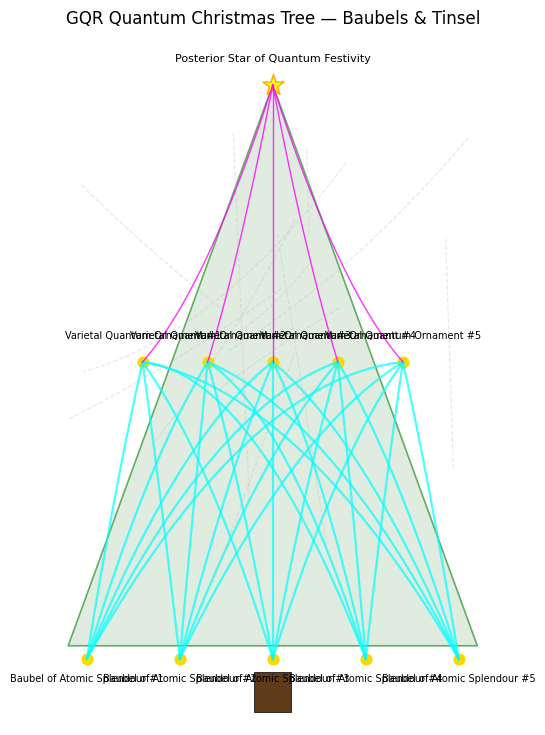

In [ ]:
import numpy as np                                         # [1]
import matplotlib.pyplot as plt                            # [2]
from matplotlib.patches import Polygon, Rectangle          # [3]
from matplotlib import colors                              # [4]
import random                                              # [5]

# =========================================================
# CONFIG
# ========================================================= [8]

# Rename priors/outputs as “baubels” and “ornaments”        # [9]

PRIORS = [                                                  # [10]
    {"name": f"Baubel of Atomic Splendour #{i+1}",
     "kappa": np.random.uniform(0.2,1.0),
     "gamma": np.random.uniform(0.4,1.0),
     "phi": np.random.uniform(0,2*np.pi)}
    for i in range(5)                                       # [15]
]

OUTPUTS = [                                                 # [17]
    {"name": f"Varietal Quantum Ornament #{j+1}",
     "phi_shift": np.random.uniform(0,2*np.pi)}
    for j in range(5)                                       # [21]
]

APEX = {"name": "Posterior Star of Quantum Festivity"}      # [23]

BASE_LINEWIDTH = 0.9                                        # [25]
CURVE_STRENGTH  = 0.35                                      # [26]

# =========================================================
# HELPERS
# ========================================================= [30]

def phase_to_rgb(phi):                                       # [31]
    hue = (phi % (2*np.pi)) / (2*np.pi)                      # [32]
    return colors.hsv_to_rgb((hue, 0.95, 0.95))              # [33]

def bezier_curve(x0,y0,x1,y1,curv):                          # [35]
    xm = 0.5*(x0+x1)                                         # [36]
    ym = 0.5*(y0+y1) + curv*abs(x1-x0)                       # [37]
    t = np.linspace(0,1,120)                                 # [38]
    x = (1-t)**2*x0 + 2*(1-t)*t*xm + t**2*x1                 # [39]
    y = (1-t)**2*y0 + 2*(1-t)*t*ym + t**2*y1                 # [40]
    return x,y                                               # [41]

# =========================================================
# GEOMETRY
# ========================================================= [45]

nP = len(PRIORS);    nO = len(OUTPUTS)                       # [46]

yP = 0.10;   yO = 0.55;   yA = 0.97                           # [48]
xP = np.linspace(0.10,0.90,nP)                               # [49]
xO = np.linspace(0.22,0.78,nO)                               # [50]
xA = 0.50                                                    # [51]

# Precompute Garland Paths                                    [53]
GARLANDS = []
for i,p in enumerate(PRIORS):                                # [55]
    for j,o in enumerate(OUTPUTS):                           # [56]
        curv = CURVE_STRENGTH*(0.3+p["kappa"])               # [57]
        x,y = bezier_curve(xP[i],yP, xO[j],yO, curv)         # [58]
        GARLANDS.append(((i,j),x,y))                         # [59]

# Precompute Apex Paths (fairy lights)                         [61]
mean_kappa = np.mean([p["kappa"] for p in PRIORS])           # [62]
mean_gamma = np.mean([p["gamma"] for p in PRIORS])           # [63]

APEX_STRINGS = []
for j,o in enumerate(OUTPUTS):                               # [65]
    curv = -CURVE_STRENGTH*(0.4+mean_kappa)                  # [66]
    x,y = bezier_curve(xO[j],yO, xA,yA, curv)                # [67]
    APEX_STRINGS.append((j,x,y))                             # [68]

# =========================================================
# ADD RANDOM TINSEL COMBS
# ========================================================= [71]

# Generate 12 random thin curves across the tree               [72]
TINSEL = []
for _ in range(12):                                           # [74]
    x0  = np.random.uniform(0.05,0.95)                        # [75]
    x1  = np.random.uniform(0.05,0.95)                        # [76]
    y0  = np.random.uniform(0.15,0.90)                        # [77]
    y1  = np.random.uniform(0.15,0.90)                        # [78]
    cur = np.random.uniform(-0.2,0.2)                         # [79]
    x,y = bezier_curve(x0,y0,x1,y1,cur)                       # [80]
    TINSEL.append((x,y))                                      # [81]

# =========================================================
# PLOT STATIC TREE
# ========================================================= [84]

fig,ax = plt.subplots(figsize=(6,9))                          # [85]

# Tree silhouette                                              # [87]
tree = Polygon([[0.50,yA],[0.06,yP+0.02],[0.94,yP+0.02]],
               closed=True, facecolor=(0,0.4,0,0.12),
               edgecolor=(0,0.5,0,0.6), linewidth=1.2)        # [91]
ax.add_patch(tree)

# Trunk                                                        # [94]
trunk = Rectangle((0.46,0.02), 0.08,0.06,
                  facecolor=(0.3,0.15,0,0.9),
                  edgecolor="black", linewidth=0.5)            # [98]
ax.add_patch(trunk)

# Draw Baubels (priors) and Ornaments (outputs)                # [101]
for i,p in enumerate(PRIORS):
    ax.scatter(xP[i],yP,s=60,color="gold")
    ax.text(xP[i],yP-0.035,p["name"],ha="center",fontsize=7)

for j,o in enumerate(OUTPUTS):
    ax.scatter(xO[j],yO,s=60,color="gold")
    ax.text(xO[j],yO+0.035,o["name"],ha="center",fontsize=7)

# Apex star                                                    # [110]
ax.scatter(xA,yA,marker="*",s=250,color="yellow",edgecolor="orange")
ax.text(xA,yA+0.035,APEX["name"],ha="center",fontsize=8)

# Plot Garland Paths                                           # [115]
for (i,j),x,y in GARLANDS:
    ax.plot(x,y,color="cyan",alpha=0.7,linewidth=1.6)

# Plot Apex “Fairy Light” Strings                              # [119]
for j,x,y in APEX_STRINGS:
    ax.plot(x,y,color="magenta",alpha=0.8,linewidth=1.0)

# Add Random Tinsel Combs                                      # [123]
for x,y in TINSEL:
    ax.plot(x,y,color="silver",alpha=0.35,linewidth=0.9,linestyle="--")

# Style                                                        # [127]
ax.set_xlim(0,1)
ax.set_ylim(0,1.05)
ax.axis("off")
ax.set_title("GQR Quantum Christmas Tree — Baubels & Tinsel",
             fontsize=12)

plt.show()

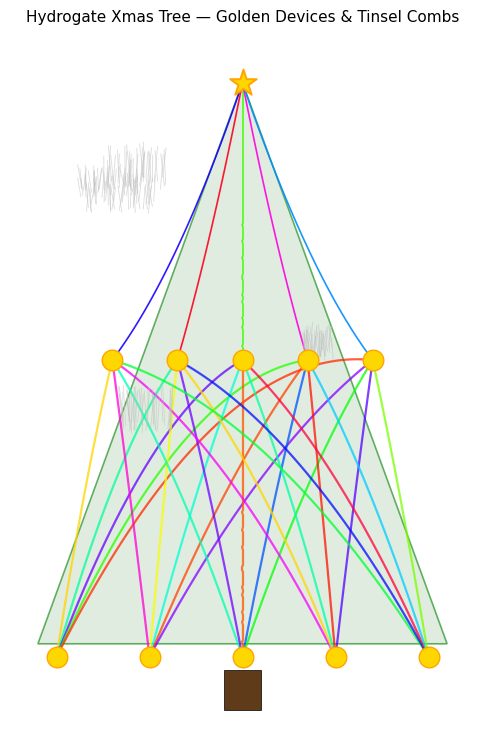

In [ ]:
import numpy as np                                       # [1]
import matplotlib.pyplot as plt                          # [2]
from matplotlib.patches import Polygon, Rectangle        # [3]

# ======================================================
# CONFIG
# ======================================================  # [6]

N_PRIORS  = 5                                            # [7]
N_OUTPUTS = 5                                            # [8]

BASE_LINEWIDTH = 0.9                                     # [9]
CURVE_STRENGTH  = 0.35                                   # [10]

# random phase etc. (used only for colours)              # [12]
rng = np.random.default_rng(123)                         # [13]
kappa = rng.uniform(0.2, 1.0, N_PRIORS)                  # [14]
gamma = rng.uniform(0.4, 1.0, N_PRIORS)                  # [15]
phi   = rng.uniform(0.0, 2*np.pi, N_PRIORS)              # [16]
phi_shift = rng.uniform(0.0, 2*np.pi, N_OUTPUTS)         # [17]

# ======================================================
# HELPERS
# ======================================================  # [20]

def phase_to_rgb(phi_val):                               # [21]
    hue = (phi_val % (2*np.pi)) / (2*np.pi)              # [22]
    return plt.cm.hsv(hue)                               # [23]

def bezier_curve(x0,y0,x1,y1,curv):                      # [25]
    xm = 0.5*(x0+x1)                                     # [26]
    ym = 0.5*(y0+y1) + curv*abs(x1-x0)                   # [27]
    t  = np.linspace(0.0, 1.0, 120)                      # [28]
    x  = (1-t)**2*x0 + 2*(1-t)*t*xm + t**2*x1            # [29]
    y  = (1-t)**2*y0 + 2*(1-t)*t*ym + t**2*y1            # [30]
    return x,y                                           # [31]

# ======================================================
# GEOMETRY
# ======================================================  # [34]

yP = 0.10;  yO = 0.55;  yA = 0.97                        # [35]
xP = np.linspace(0.10, 0.90, N_PRIORS)                   # [36]
xO = np.linspace(0.22, 0.78, N_OUTPUTS)                  # [37]
xA = 0.50                                                # [38]

# garlands                                               # [40]
GARLANDS = []
for i in range(N_PRIORS):                                # [42]
    for j in range(N_OUTPUTS):                           # [43]
        curv = CURVE_STRENGTH*(0.3 + kappa[i])           # [44]
        x,y = bezier_curve(xP[i], yP, xO[j], yO, curv)   # [45]
        GARLANDS.append((i,j,x,y))                       # [46]

# apex strings                                           # [48]
mean_kappa = np.mean(kappa)                              # [49]
mean_gamma = np.mean(gamma)                              # [50]
APEX_STRINGS = []
for j in range(N_OUTPUTS):                               # [52]
    curv = -CURVE_STRENGTH*(0.4 + mean_kappa)           # [53]
    x,y = bezier_curve(xO[j], yO, xA, yA, curv)         # [54]
    APEX_STRINGS.append((j,x,y))                         # [55]

# ======================================================
# TINSEL COMBS (spiky clusters like the hydrogate plot)
# ======================================================  # [58]

TINSEL_COMBS = []                                        # [59]
N_COMBS      = 5                                         # [60]
SPIKES_PER   = 35                                        # [61]

for _ in range(N_COMBS):                                 # [63]
    base_x = rng.uniform(0.12, 0.88)                     # [64]
    base_y = rng.uniform(0.35, 0.95)                     # [65]
    height = rng.uniform(0.03, 0.10)                     # [66]
    spread = rng.uniform(0.02, 0.08)                     # [67]
    spikes = []                                          # [68]
    for _s in range(SPIKES_PER):                         # [69]
        dx = rng.uniform(-spread, spread)                # [70]
        dy = rng.uniform(-0.01, 0.01)                    # [71]
        x0 = base_x + dx                                 # [72]
        y0 = base_y + dy                                 # [73]
        x1 = x0 + rng.uniform(-0.01, 0.01)               # [74]
        y1 = y0 + height * rng.uniform(0.7, 1.0)         # [75]
        spikes.append((x0,y0,x1,y1))                     # [76]
    TINSEL_COMBS.append(spikes)                          # [77]

# ======================================================
# PLOT
# ======================================================  # [80]

fig,ax = plt.subplots(figsize=(6,9))                     # [81]

# tree silhouette                                         # [83]
tree = Polygon([[0.50,yA],[0.06,yP+0.02],[0.94,yP+0.02]],
               closed=True,
               facecolor=(0.0,0.4,0.0,0.12),
               edgecolor=(0.0,0.5,0.0,0.6),
               linewidth=1.2)                             # [88]
ax.add_patch(tree)

# trunk                                                   # [90]
trunk = Rectangle((0.46,0.02),0.08,0.06,
                  facecolor=(0.3,0.15,0.0,0.9),
                  edgecolor="black",linewidth=0.5)        # [93]
ax.add_patch(trunk)

# baubels (priors) — gold spheres, no text                # [95]
for i in range(N_PRIORS):                                 # [96]
    ax.scatter(xP[i], yP, s=220,
               facecolor="gold",
               edgecolor="orange",
               linewidth=1.0,
               zorder=5)                                  # [101]

# ornaments (outputs) — gold spheres, no text             # [103]
for j in range(N_OUTPUTS):                                # [104]
    ax.scatter(xO[j], yO, s=220,
               facecolor="gold",
               edgecolor="orange",
               linewidth=1.0,
               zorder=5)                                  # [109]

# apex star                                               # [111]
ax.scatter(xA, yA, marker="*", s=400,
           facecolor="gold",
           edgecolor="orange",
           linewidth=1.4,
           zorder=6)                                      # [115]

# garlands                                                # [117]
for i,j,x,y in GARLANDS:                                  # [118]
    col = phase_to_rgb(phi[i] + phi_shift[j])             # [119]
    ax.plot(x, y, color=col, alpha=0.75,
            linewidth=1.6, zorder=2)                      # [121]

# apex strings                                            # [123]
for j,x,y in APEX_STRINGS:                                # [124]
    col = phase_to_rgb(mean_kappa + phi_shift[j])         # [125]
    ax.plot(x, y, color=col, alpha=0.9,
            linewidth=1.2, zorder=3)                      # [127]

# tinsel combs — silver spiky clusters                    # [129]
for comb in TINSEL_COMBS:                                 # [130]
    for x0,y0,x1,y1 in comb:                              # [131]
        ax.plot([x0,x1],[y0,y1],
                color="silver",
                alpha=0.55,
                linewidth=0.6,
                zorder=4)                                 # [135]

ax.set_xlim(0.0,1.0)                                      # [137]
ax.set_ylim(0.0,1.05)                                     # [138]
ax.axis("off")                                            # [139]
ax.set_title("Hydrogate Xmas Tree — Golden Devices & Tinsel Combs",
             fontsize=11)                                 # [141]

plt.show()                                                # [143]

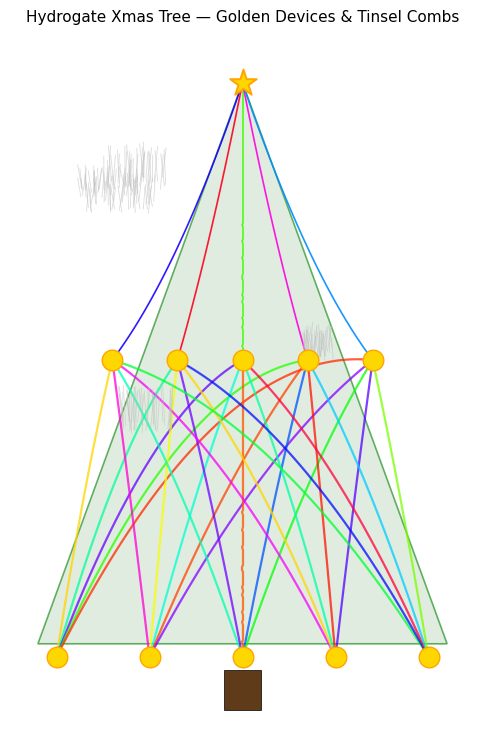

In [ ]:
import numpy as np                                       # [1]
import matplotlib.pyplot as plt                          # [2]
from matplotlib.patches import Polygon, Rectangle        # [3]

# ======================================================
# CONFIG
# ======================================================  # [6]

N_PRIORS  = 5                                            # [7]
N_OUTPUTS = 5                                            # [8]

BASE_LINEWIDTH = 0.9                                     # [9]
CURVE_STRENGTH  = 0.35                                   # [10]

# random phase etc. (used only for colours)              # [12]
rng = np.random.default_rng(123)                         # [13]
kappa = rng.uniform(0.2, 1.0, N_PRIORS)                  # [14]
gamma = rng.uniform(0.4, 1.0, N_PRIORS)                  # [15]
phi   = rng.uniform(0.0, 2*np.pi, N_PRIORS)              # [16]
phi_shift = rng.uniform(0.0, 2*np.pi, N_OUTPUTS)         # [17]

# ======================================================
# HELPERS
# ======================================================  # [20]

def phase_to_rgb(phi_val):                               # [21]
    hue = (phi_val % (2*np.pi)) / (2*np.pi)              # [22]
    return plt.cm.hsv(hue)                               # [23]

def bezier_curve(x0,y0,x1,y1,curv):                      # [25]
    xm = 0.5*(x0+x1)                                     # [26]
    ym = 0.5*(y0+y1) + curv*abs(x1-x0)                   # [27]
    t  = np.linspace(0.0, 1.0, 120)                      # [28]
    x  = (1-t)**2*x0 + 2*(1-t)*t*xm + t**2*x1            # [29]
    y  = (1-t)**2*y0 + 2*(1-t)*t*ym + t**2*y1            # [30]
    return x,y                                           # [31]

# ======================================================
# GEOMETRY
# ======================================================  # [34]

yP = 0.10;  yO = 0.55;  yA = 0.97                        # [35]
xP = np.linspace(0.10, 0.90, N_PRIORS)                   # [36]
xO = np.linspace(0.22, 0.78, N_OUTPUTS)                  # [37]
xA = 0.50                                                # [38]

# garlands                                               # [40]
GARLANDS = []
for i in range(N_PRIORS):                                # [42]
    for j in range(N_OUTPUTS):                           # [43]
        curv = CURVE_STRENGTH*(0.3 + kappa[i])           # [44]
        x,y = bezier_curve(xP[i], yP, xO[j], yO, curv)   # [45]
        GARLANDS.append((i,j,x,y))                       # [46]

# apex strings                                           # [48]
mean_kappa = np.mean(kappa)                              # [49]
mean_gamma = np.mean(gamma)                              # [50]
APEX_STRINGS = []
for j in range(N_OUTPUTS):                               # [52]
    curv = -CURVE_STRENGTH*(0.4 + mean_kappa)           # [53]
    x,y = bezier_curve(xO[j], yO, xA, yA, curv)         # [54]
    APEX_STRINGS.append((j,x,y))                         # [55]

# ======================================================
# TINSEL COMBS (spiky clusters like the hydrogate plot)
# ======================================================  # [58]

TINSEL_COMBS = []                                        # [59]
N_COMBS      = 5                                         # [60]
SPIKES_PER   = 35                                        # [61]

for _ in range(N_COMBS):                                 # [63]
    base_x = rng.uniform(0.12, 0.88)                     # [64]
    base_y = rng.uniform(0.35, 0.95)                     # [65]
    height = rng.uniform(0.03, 0.10)                     # [66]
    spread = rng.uniform(0.02, 0.08)                     # [67]
    spikes = []                                          # [68]
    for _s in range(SPIKES_PER):                         # [69]
        dx = rng.uniform(-spread, spread)                # [70]
        dy = rng.uniform(-0.01, 0.01)                    # [71]
        x0 = base_x + dx                                 # [72]
        y0 = base_y + dy                                 # [73]
        x1 = x0 + rng.uniform(-0.01, 0.01)               # [74]
        y1 = y0 + height * rng.uniform(0.7, 1.0)         # [75]
        spikes.append((x0,y0,x1,y1))                     # [76]
    TINSEL_COMBS.append(spikes)                          # [77]

# ======================================================
# PLOT
# ======================================================  # [80]

fig,ax = plt.subplots(figsize=(6,9))                     # [81]

# tree silhouette                                         # [83]
tree = Polygon([[0.50,yA],[0.06,yP+0.02],[0.94,yP+0.02]],
               closed=True,
               facecolor=(0.0,0.4,0.0,0.12),
               edgecolor=(0.0,0.5,0.0,0.6),
               linewidth=1.2)                             # [88]
ax.add_patch(tree)

# trunk                                                   # [90]
trunk = Rectangle((0.46,0.02),0.08,0.06,
                  facecolor=(0.3,0.15,0.0,0.9),
                  edgecolor="black",linewidth=0.5)        # [93]
ax.add_patch(trunk)

# baubels (priors) — gold spheres, no text                # [95]
for i in range(N_PRIORS):                                 # [96]
    ax.scatter(xP[i], yP, s=220,
               facecolor="gold",
               edgecolor="orange",
               linewidth=1.0,
               zorder=5)                                  # [101]

# ornaments (outputs) — gold spheres, no text             # [103]
for j in range(N_OUTPUTS):                                # [104]
    ax.scatter(xO[j], yO, s=220,
               facecolor="gold",
               edgecolor="orange",
               linewidth=1.0,
               zorder=5)                                  # [109]

# apex star                                               # [111]
ax.scatter(xA, yA, marker="*", s=400,
           facecolor="gold",
           edgecolor="orange",
           linewidth=1.4,
           zorder=6)                                      # [115]

# garlands                                                # [117]
for i,j,x,y in GARLANDS:                                  # [118]
    col = phase_to_rgb(phi[i] + phi_shift[j])             # [119]
    ax.plot(x, y, color=col, alpha=0.75,
            linewidth=1.6, zorder=2)                      # [121]

# apex strings                                            # [123]
for j,x,y in APEX_STRINGS:                                # [124]
    col = phase_to_rgb(mean_kappa + phi_shift[j])         # [125]
    ax.plot(x, y, color=col, alpha=0.9,
            linewidth=1.2, zorder=3)                      # [127]

# tinsel combs — silver spiky clusters                    # [129]
for comb in TINSEL_COMBS:                                 # [130]
    for x0,y0,x1,y1 in comb:                              # [131]
        ax.plot([x0,x1],[y0,y1],
                color="silver",
                alpha=0.55,
                linewidth=0.6,
                zorder=4)                                 # [135]

ax.set_xlim(0.0,1.0)                                      # [137]
ax.set_ylim(0.0,1.05)                                     # [138]
ax.axis("off")                                            # [139]
ax.set_title("Hydrogate Xmas Tree — Golden Devices & Tinsel Combs",
             fontsize=11)                                 # [141]

plt.show()                                                # [143]

In [ ]:
import numpy as np                                      # [1]
import matplotlib.pyplot as plt                         # [2]
from matplotlib.patches import Polygon, Rectangle       # [3]

# ======================================================
# CONFIG
# ======================================================  # [6]

N_PRIORS   = 6                                          # [7]
N_OUTPUTS  = 6                                          # [8]
N_CUBANES  = 6                                          # [9]
N_CROSSARC = 10                                         # [10]
N_TINSEL   = 8                                          # [11]

DOPANT_COLORS = ["gold", "cyan", "red",
                 "royalblue", "magenta", "lime"]        # [14]

rng = np.random.default_rng(2025)                       # [15]

# random parameters for phases etc.                      # [17]
kappa = rng.uniform(0.2, 1.0, N_PRIORS)                 # [18]
gamma = rng.uniform(0.4, 1.0, N_PRIORS)                 # [19]
phi   = rng.uniform(0.0, 2*np.pi, N_PRIORS)             # [20]
phi_shift = rng.uniform(0.0, 2*np.pi, N_OUTPUTS)        # [21]

# ======================================================
# HELPERS
# ======================================================  # [24]

def phase_to_rgb(phi_val):                              # [25]
    hue = (phi_val % (2*np.pi)) / (2*np.pi)             # [26]
    return plt.cm.hsv(hue)                              # [27]

def bezier_curve(x0,y0,x1,y1,curv, n=150):              # [29]
    xm = 0.5*(x0+x1)                                    # [30]
    ym = 0.5*(y0+y1) + curv*abs(x1-x0)                  # [31]
    t  = np.linspace(0.0, 1.0, n)                       # [32]
    x  = (1-t)**2*x0 + 2*(1-t)*t*xm + t**2*x1           # [33]
    y  = (1-t)**2*y0 + 2*(1-t)*t*ym + t**2*y1           # [34]
    return x,y                                          # [35]

# small “fur” branches along a curve                     # [37]
def add_fur(ax, x, y, color, density=0.15,
            max_len=0.02):                              # [38]
    n = len(x)